In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load the dataset
df=pd.read_excel('glass.xlsx',sheet_name='glass')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
#EDA

In [5]:
# identify null values
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
# identify outliers

In [9]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

In [10]:
print(Q1,Q3,IQR)

RI       1.516522
Na      12.907500
Mg       2.115000
Al       1.190000
Si      72.280000
K        0.122500
Ca       8.240000
Ba       0.000000
Fe       0.000000
Type     1.000000
Name: 0.25, dtype: float64 RI       1.519157
Na      13.825000
Mg       3.600000
Al       1.630000
Si      73.087500
K        0.610000
Ca       9.172500
Ba       0.000000
Fe       0.100000
Type     3.000000
Name: 0.75, dtype: float64 RI      0.002635
Na      0.917500
Mg      1.485000
Al      0.440000
Si      0.807500
K       0.487500
Ca      0.932500
Ba      0.000000
Fe      0.100000
Type    2.000000
dtype: float64


In [11]:
lower_extreme=Q1-1.5*IQR
upper_extreme=Q3+1.5*IQR
print(lower_extreme ,upper_extreme)

RI       1.51257
Na      11.53125
Mg      -0.11250
Al       0.53000
Si      71.06875
K       -0.60875
Ca       6.84125
Ba       0.00000
Fe      -0.15000
Type    -2.00000
dtype: float64 RI       1.52311
Na      15.20125
Mg       5.82750
Al       2.29000
Si      74.29875
K        1.34125
Ca      10.57125
Ba       0.00000
Fe       0.25000
Type     6.00000
dtype: float64


In [12]:
# Find no of outliers in every column
df_no_outliers = ((df < lower_extreme) | (df > upper_extreme)).sum()
df_no_outliers

RI      17
Na       7
Mg       0
Al      18
Si      12
K        7
Ca      26
Ba      38
Fe      12
Type    29
dtype: int64

In [13]:
# Remove outliers in columns
columns=df.columns
for col in columns:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]
print(df)

          RI     Na    Mg    Al     Si     K    Ca   Ba    Fe  Type
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00     1
6    1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.0  0.00     1
..       ...    ...   ...   ...    ...   ...   ...  ...   ...   ...
155  1.51646  13.04  3.40  1.26  73.01  0.52  8.58  0.0  0.00     3
156  1.51655  13.41  3.39  1.28  72.64  0.52  8.65  0.0  0.00     3
158  1.51776  13.53  3.41  1.52  72.04  0.58  8.79  0.0  0.00     3
159  1.51796  13.50  3.36  1.63  71.94  0.57  8.81  0.0  0.09     3
160  1.51832  13.33  3.34  1.54  72.14  0.56  8.99  0.0  0.00     3

[104 rows x 10 columns]


In [14]:
# Data Visualization

In [15]:
# Boxplot

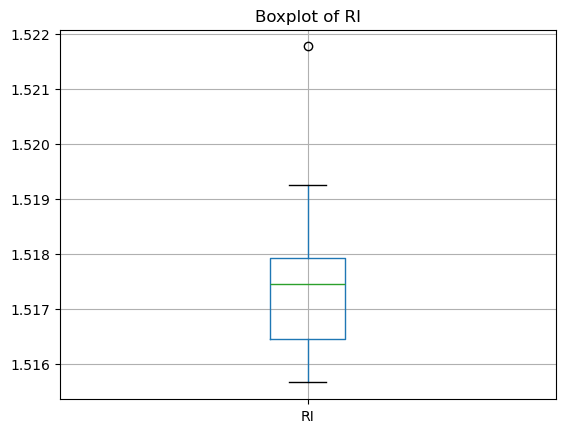

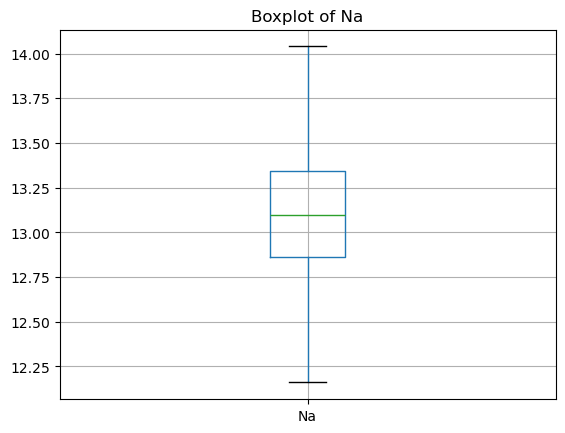

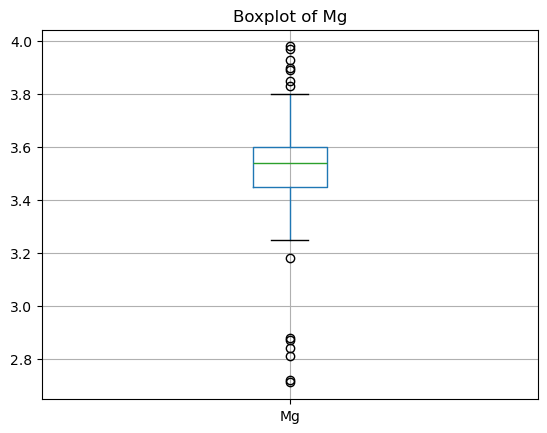

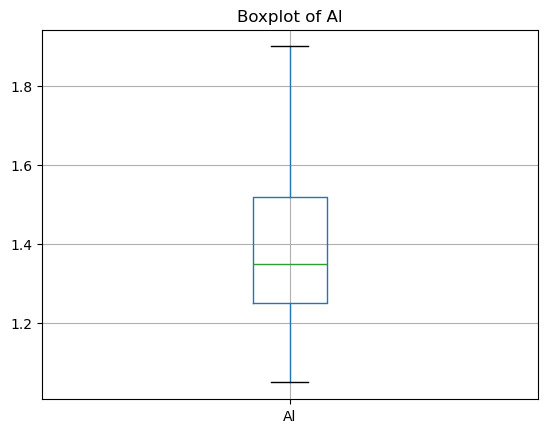

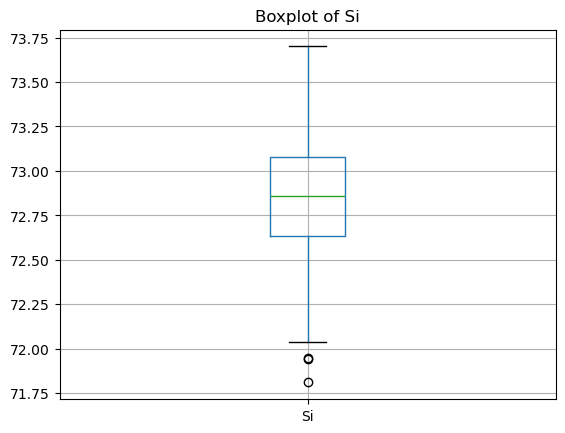

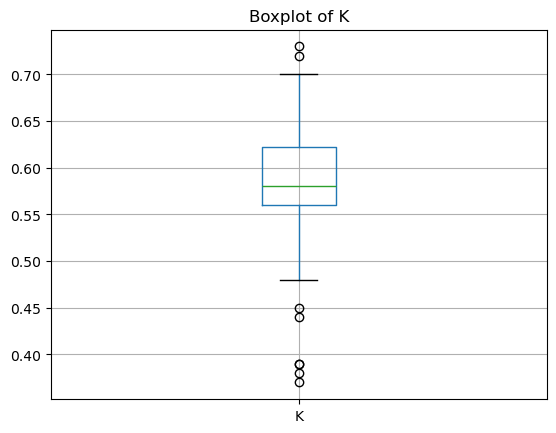

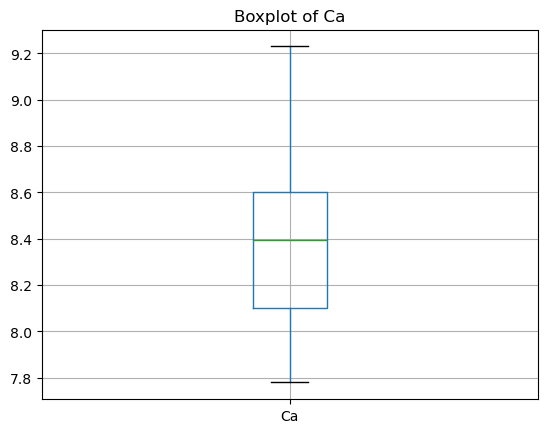

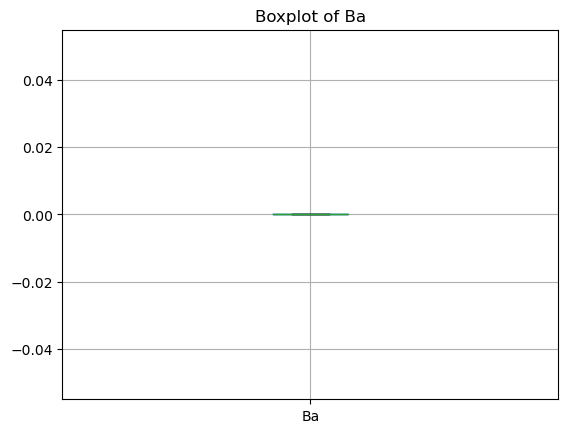

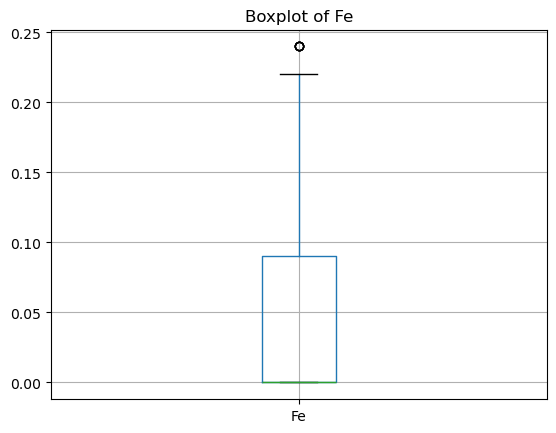

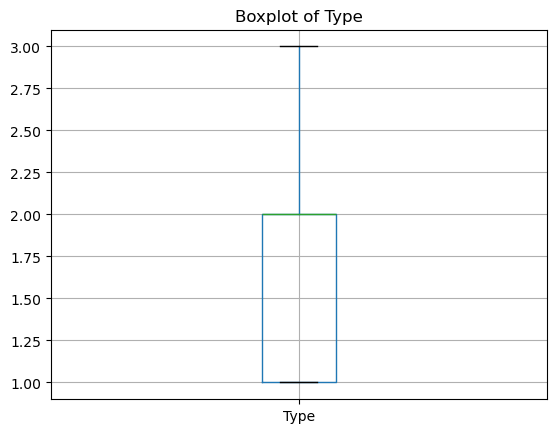

In [16]:

columns=df.columns
for col in columns:
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

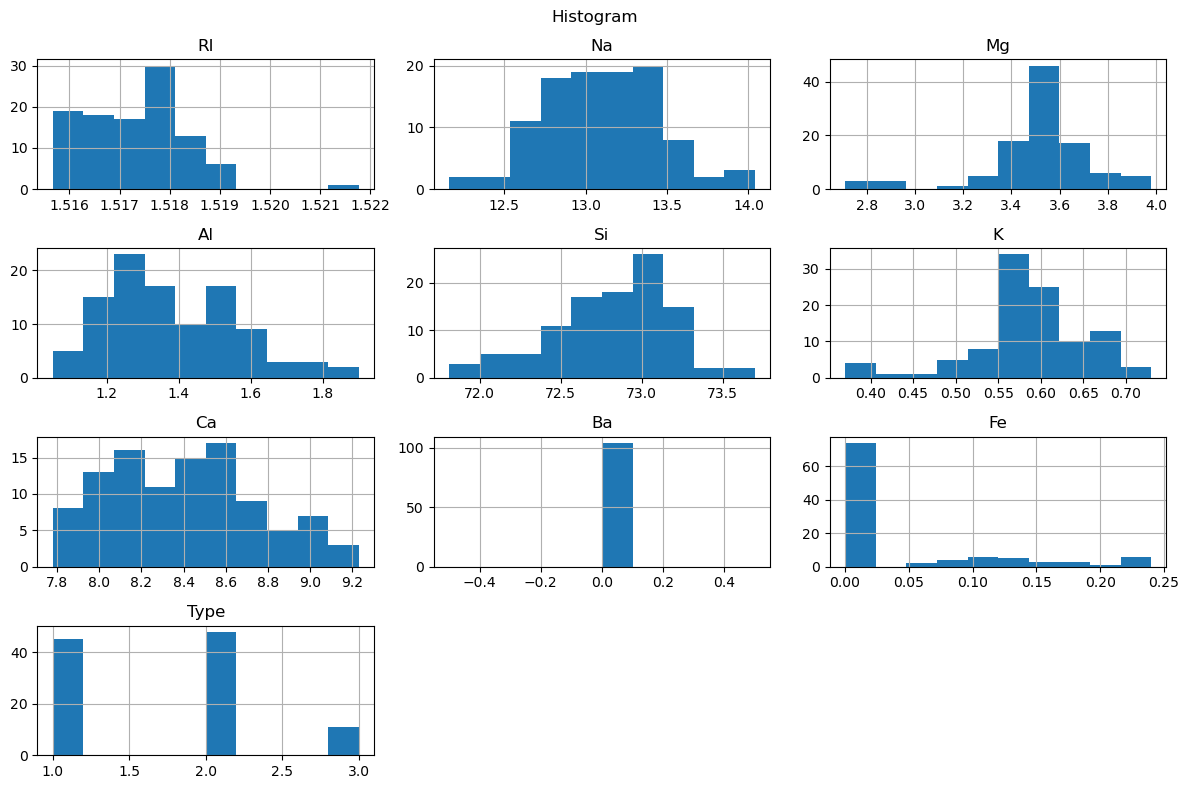

In [17]:
# Histogram
df.hist(figsize=(12,8))
plt.suptitle('Histogram')
plt.tight_layout()
plt.show()

In [18]:
import seaborn as sns

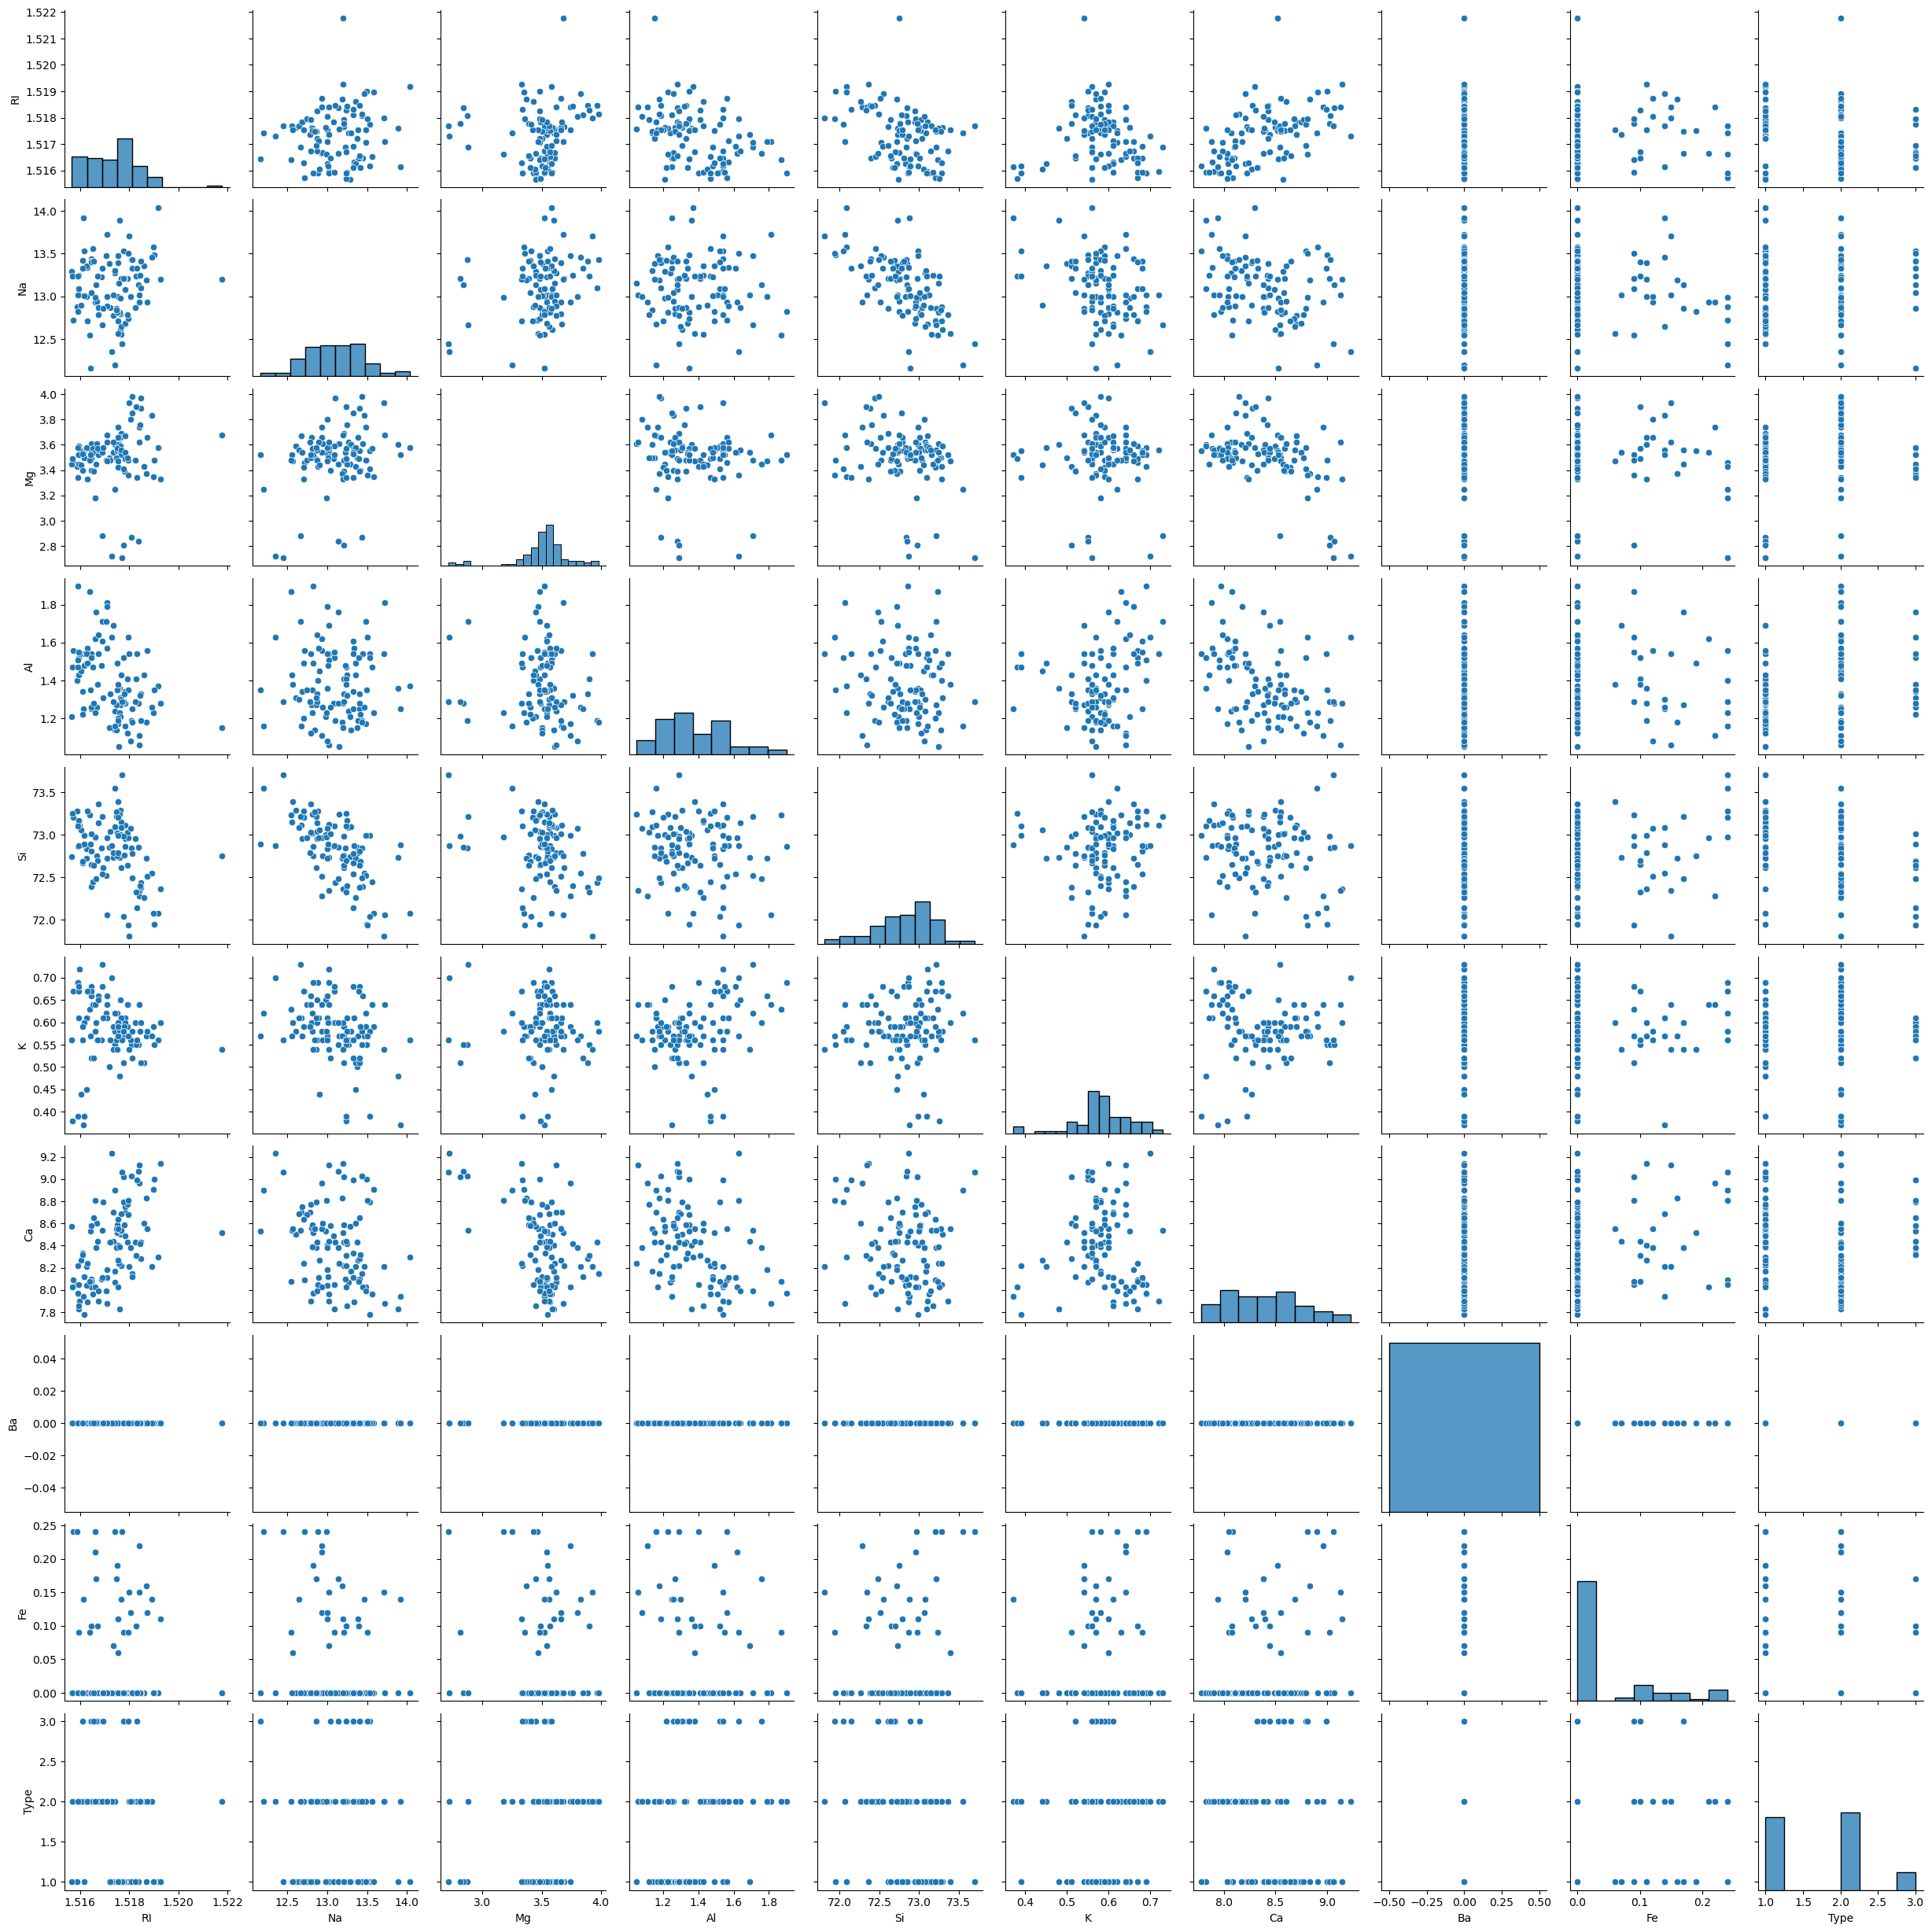

In [19]:
# Pair plot
sns.pairplot(df[columns])
plt.show()

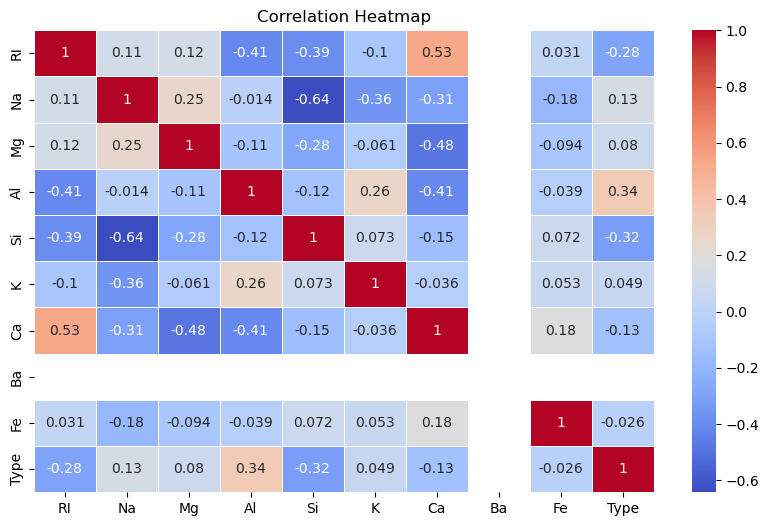

In [20]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidth=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [21]:
# Data Preprocessing
# There is no missing values in the dataset
# There is no categorical variables 

In [22]:
#Standard_scaling
from sklearn.preprocessing import StandardScaler

In [23]:
std_sca=StandardScaler()

In [24]:
df_scaled=pd.DataFrame(std_sca.fit_transform(df),columns=df.columns)
df_scaled

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.292266,2.265044,0.409689,-0.123542,-0.234911,-1.548993,-1.623524,0.0,-0.579856,-1.024549
1,-1.134714,1.234503,0.186612,0.848185,0.475602,-2.877917,-1.766445,0.0,-0.579856,-1.024549
2,0.342160,0.318466,0.811226,-0.501436,-0.562840,-0.220068,-0.508743,0.0,-0.579856,-1.024549
3,0.102667,0.490223,0.498919,-0.771360,0.721549,-0.515384,-0.937505,0.0,-0.579856,-1.024549
4,0.112646,0.576101,0.409689,-1.311208,0.748877,-0.072409,-0.651663,0.0,-0.579856,-1.024549
...,...,...,...,...,...,...,...,...,...,...
99,-0.855305,-0.168179,-0.482617,-0.663390,0.530257,-0.958359,0.520286,0.0,-0.579856,2.019825
100,-0.765495,0.890989,-0.527233,-0.555421,-0.480858,-0.958359,0.720375,0.0,-0.579856,2.019825
101,0.441949,1.234503,-0.438002,0.740215,-2.120503,-0.072409,1.120553,0.0,-0.579856,2.019825
102,0.641527,1.148624,-0.661079,1.334048,-2.393777,-0.220068,1.177721,0.0,0.653655,2.019825


In [25]:
target=df[['Type']]
target

,Type
1,1
2,1
3,1
4,1
6,1
...,...
155,3
156,3
158,3
159,3


In [26]:
target.value_counts()

Type
2       48
1       45
3       11
dtype: int64

In [27]:
features=df.drop(columns='Type')
features

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00
...,...,...,...,...,...,...,...,...,...
155,1.51646,13.04,3.40,1.26,73.01,0.52,8.58,0.0,0.00
156,1.51655,13.41,3.39,1.28,72.64,0.52,8.65,0.0,0.00
158,1.51776,13.53,3.41,1.52,72.04,0.58,8.79,0.0,0.00
159,1.51796,13.50,3.36,1.63,71.94,0.57,8.81,0.0,0.09


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
#Divide the data into train and test split
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100)

In [30]:
print(x_train.shape)

(78, 9)


In [31]:
print(x_test.shape)

(26, 9)


In [32]:
# create Decision tree

In [33]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [34]:
dec_tree= DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=3)

In [35]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, splitter='random')

In [36]:
y_pred=dec_tree.predict(x_test)
y_pred

array([2, 2, 1, 1, 1, 2, 3, 3, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1,
       2, 1, 1, 1], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score,classification_report

In [38]:
accuracy_score(y_test,y_pred)

0.7692307692307693

In [39]:
params={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[1,2,3,4,5,6]}

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
grid_search=GridSearchCV(dec_tree,params)

In [42]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3, splitter='random'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'splitter': ['best', 'random']})

In [43]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 6, 'splitter': 'best'}

In [44]:
target.value_counts()

Type
2       48
1       45
3       11
dtype: int64

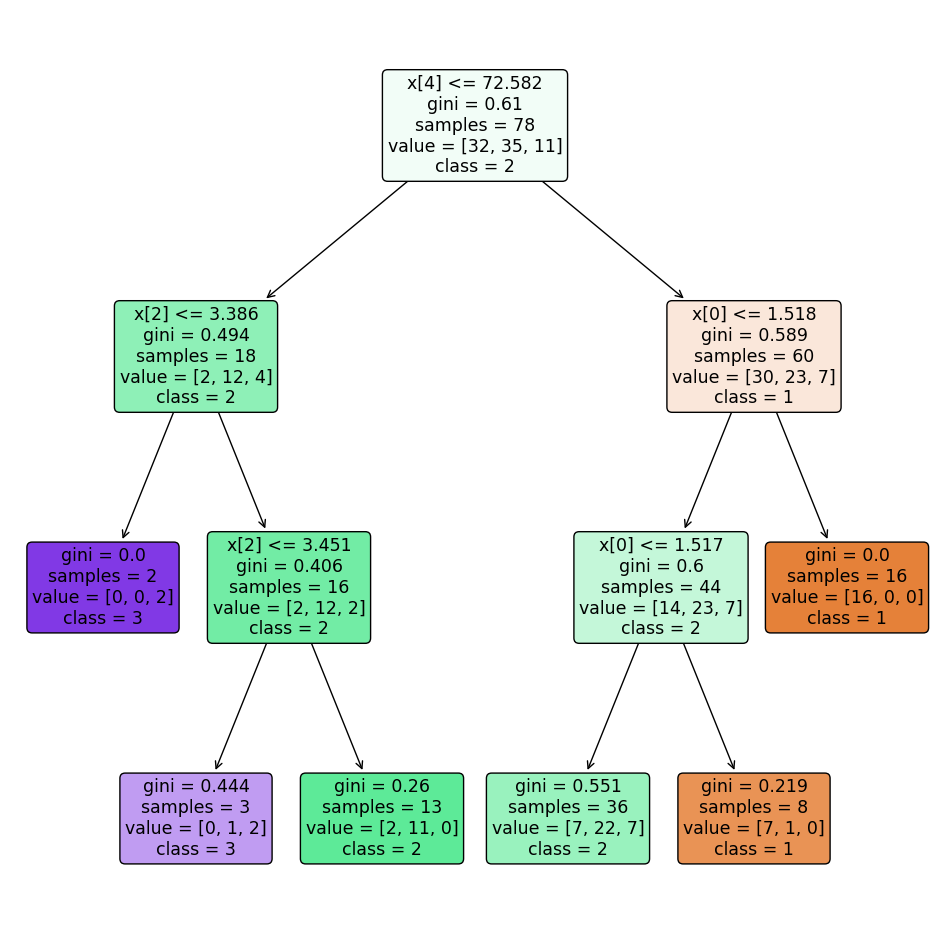

In [45]:
plt.figure(figsize=(12,12))
plot_tree(dec_tree,filled=True,max_depth=6,rounded=True,class_names=['1','2','3'])
plt.show()

In [46]:
# Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rand_forest= RandomForestClassifier(n_estimators=50,bootstrap=True,max_samples=1.0,max_features='sqrt')

In [49]:
rand_forest.fit(x_train,y_train)

RandomForestClassifier(max_samples=1.0, n_estimators=50)

In [50]:
y_pred= rand_forest.predict(x_test)
y_pred

array([1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 3, 2, 1, 2, 1, 1, 1,
       2, 1, 1, 1], dtype=int64)

In [51]:
accuracy_score(y_test,y_pred)

0.8076923076923077

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.75      0.92      0.83        13
           2       1.00      0.69      0.82        13
           3       0.00      0.00      0.00         0

    accuracy                           0.81        26
   macro avg       0.58      0.54      0.55        26
weighted avg       0.88      0.81      0.82        26



In [53]:
# Bagging classifier

In [54]:
from sklearn.ensemble import BaggingClassifier

In [55]:
bag_cla=BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=100,bootstrap=False,random_state=100)

In [56]:
bag_cla.fit(x_train,y_train)

BaggingClassifier(bootstrap=False, estimator=DecisionTreeClassifier(),
                  n_estimators=100, random_state=100)

In [57]:
y_pred=bag_cla.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 2, 3, 3, 2, 2, 1, 1, 2, 1, 2, 3, 3, 1, 2, 1, 1, 1,
       2, 1, 1, 1], dtype=int64)

In [58]:
accuracy_score(y_test,y_pred)

0.6538461538461539

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.67      0.77      0.71        13
           2       1.00      0.54      0.70        13
           3       0.00      0.00      0.00         0

    accuracy                           0.65        26
   macro avg       0.56      0.44      0.47        26
weighted avg       0.83      0.65      0.71        26



In [60]:
#  GradientBoostingClassifier

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
grad_boost= GradientBoostingClassifier(n_estimators=50,learning_rate=0.5,subsample=0.9)

In [63]:
grad_boost.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.5, n_estimators=50, subsample=0.9)

In [64]:
y_pred=grad_boost.predict(x_test)
y_pred               

array([1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1,
       2, 1, 1, 1], dtype=int64)

In [65]:
accuracy_score(y_test,y_pred)

0.8076923076923077

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.72      1.00      0.84        13
           2       1.00      0.62      0.76        13

    accuracy                           0.81        26
   macro avg       0.86      0.81      0.80        26
weighted avg       0.86      0.81      0.80        26



# comparison of gradientboost and bagging
The Gradient Boosting Classifier outperforms the Bagging Classifier in terms of accuracy (0.81 vs. 0.65) and provides a better balance between precision, recall, and F1-score, particularly for Class 1, where its recall reaches 1.00. While both classifiers maintain high precision, Gradient Boosting’s higher macro and weighted averages highlight its more consistent performance across classes. Thus, Gradient Boosting proves to be the preferable option in this scenario due to its superior accuracy and balanced classification.

# Explain Bagging and Boosting methods. How is it different from each other.
### Bagging (Bootstrap Aggregating)
- **Purpose**: Reduces variance and prevents overfitting.
- **Method**:
  - Randomly samples subsets of data with replacement.
  - Trains multiple independent models (e.g., decision trees).
  - Combines predictions by averaging (regression) or voting (classification).
- **Key Feature**: Parallel training of models.

### Boosting
- **Purpose**: Reduces bias and variance.
- **Method**:
  - Trains models sequentially, focusing on errors from previous models.
  - Adjusts weights for misclassified instances to improve accuracy.
  - Combines predictions through a weighted sum.
- **Key Feature**: Dependent training of models.

### Key Differences
- **Training Style**: 
  - Bagging: Parallel (independent).
  - Boosting: Sequential (dependent).
- **Focus**: 
  - Bagging: Variance reduction.
  - Boosting: Bias and variance reduction.
- **Final Prediction**:
  - Bagging: Averaging or voting.
  - Boosting: Weighted sum.
- **Complexity**: 
  - Bagging: Simpler and faster.
  - Boosting: More complex, higher risk of overfitting.

### Handling Imbalanced Data

1. **Resampling Techniques**:
   - **Oversampling**:
     - **Random Oversampling**: Duplicate minority class instances.
     - **SMOTE**: Create synthetic minority samples by interpolation.
   - **Undersampling**:
     - **Random Undersampling**: Remove majority class instances.
     - **Tomek Links**: Eliminate majority instances near minority instances.

2. **Use Different Evaluation Metrics**:
   - Focus on **Precision**, **Recall**, **F1 Score**, and **AUC-ROC** for a better performance assessment.

3. **Use Algorithms That Handle Imbalance**:
   - Consider ensemble methods like **Random Forest** and **Gradient Boosting**.
   - Implement **Cost-sensitive Learning** to penalize minority class misclassifications.

4. **Ensemble Techniques**:
   - Combine models (e.g., Bagging, Boosting) to enhance performance on minority classes.

5. **Data Augmentation**:
   - Generate more minority class samples through transformations (e.g., rotation, noise).

6. **Stratified Sampling**:
   - Ensure representative class distribution in training and testing datasets.

7. **Anomaly Detection Techniques**:
   - Treat rare minority classes as anomalies to identify them effectively.

By applying these techniques, you can improve the performance and reliability of models dealing with imbalanced datasets.